In [26]:
import sys !{sys.executable} -m pip install pyEX==0.1.13 
from hypar import stock
from hypar import portfolio
from hypar import data_collection
from hypar import plotting
from hypar import analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The Basics of Using Jupyter

Jupyter is an easy way for programmers and data scientists to openly share their backend (code) while also allowing for plain text (like this) to supplement what is written in the code. To use the Jupyter environment, there are a few basic things that one should know about...

* Saving and opening a notebook
* **import** (and **from**) statements
* Cell types (code and markdown)
* Cells: editing, adding/removing, running
* Kernel: interrupt, restart
* help() $\rightarrow$ SUPER HELPFUL (who would've guessed?)

# IEX API

To gain access to the API, go to https://www.iexcloud.io to create an account. Then go to https://www.iexcloud.io/console/tokens to find your API token. Unless you want to get real data, it is recommended that you turn on "Viewing Test Data" along the left panel. Any API usage while this is on will not count towards your monthly API allowance. Note that your API token changes when this option is active.

Here is an arrow-digram outlining the Portfolio creation pipeline:

\begin{equation}
\text{User input} \rightarrow \text{IEX Cloud API} \rightarrow \text{bind data to Stock object} \rightarrow \text{Portfolio object containing Stocks (and data)}
\end{equation}

# Making a Portfolio

In [3]:
p = data_collection.generate_portfolio()

Enter "stable" for real data and "sandbox" for test data: sandbox
Version already exists
Symbols (separate with comma): nvda, amd, wal, fb
Timeframe (max (15yr), 5y, 2y, 1y, ytd, 6m, 3m, 1m): 1m
Type the numbers corresponding to the data of interest (separate with comma): 
[1] price data
[2] balance sheet
[3] book data
[4] cash flow
[5] company data
[6] earnings
[7] income statement
[8] intraday data
[9] key stats
[10] price target
1


In [7]:
# Portfolio is an Ordered Dict with keys being the tickers and the values being the Stock objects.
p.stocks

OrderedDict([('NVDA', <hypar.stock.Stock at 0x13b939b0>),
             ('AMD', <hypar.stock.Stock at 0x13c1f310>),
             ('WAL', <hypar.stock.Stock at 0x13c19430>),
             ('FB', <hypar.stock.Stock at 0x13c193b0>)])

In [9]:
# Get a Stock's data.
p.stocks['NVDA']

In [12]:
# Use .<attribute> to get different pieces of data.
p.stocks['NVDA'].price_data[0] # The index is just because the dictionary is a list

{'date': '2019-05-29',
 'open': 145.66,
 'close': 141.95,
 'high': 145.57,
 'low': 138.99,
 'volume': 14342191,
 'uOpen': 142.79,
 'uClose': 142.25,
 'uHigh': 144.48,
 'uLow': 143.72,
 'uVolume': 14304748,
 'change': 0,
 'changePercent': 0,
 'label': 'May 29',
 'changeOverTime': 0}

In [16]:
# Notice the above notation is not very convient, so use the following method to "slice" the data.
# Data can be returned in different formats, so use help(p.get_data_slice) to learn more about this.
p.get_data_slice('close')[0]

('NVDA',
 [('2019-05-29', 141.95),
  ('2019-05-30', 144.04),
  ('2019-05-31', 142.23),
  ('2019-06-03', 137.09),
  ('2019-06-04', 149),
  ('2019-06-05', 146.19),
  ('2019-06-06', 150.1),
  ('2019-06-07', 149.3),
  ('2019-06-10', 152.59),
  ('2019-06-11', 157.28),
  ('2019-06-12', 150.9),
  ('2019-06-13', 149.68),
  ('2019-06-14', 145.97),
  ('2019-06-17', 148.23),
  ('2019-06-18', 158.8),
  ('2019-06-19', 158.13),
  ('2019-06-20', 155.3),
  ('2019-06-21', 153.16),
  ('2019-06-24', 155.42),
  ('2019-06-25', 153.04),
  ('2019-06-26', 163.38),
  ('2019-06-27', 166.5),
  ('2019-06-28', 167.73)])

# Plotting (all are not working temporarily, sorry)

* Time series - not currently working with new implementation (sorry)
* CDF - again, not currently working
* Spearman rank correlation heatmap

# Analysis

* Spearman rank coefficients
* Statistical moments - not currently working (sorry)

In [19]:
analysis.correlation(p) # use help() to get an understanding for how you can weight the correlations.

[['WAL', 'FB', 0.0045588235294117645],
 ['FB', 'WAL', 0.0045588235294117645],
 ['AMD', 'FB', 0.07426470588235294],
 ['FB', 'AMD', 0.07426470588235294],
 ['NVDA', 'FB', 0.07720588235294118],
 ['FB', 'NVDA', 0.07720588235294118],
 ['AMD', 'WAL', 0.08161764705882352],
 ['WAL', 'AMD', 0.08161764705882352],
 ['NVDA', 'WAL', 0.10132352941176472],
 ['WAL', 'NVDA', 0.10132352941176472],
 ['NVDA', 'AMD', 0.16102941176470587],
 ['AMD', 'NVDA', 0.16102941176470587]]

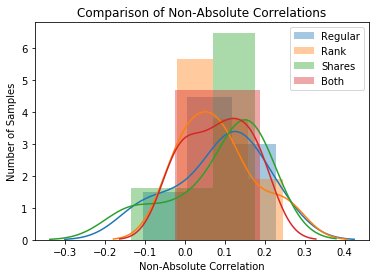

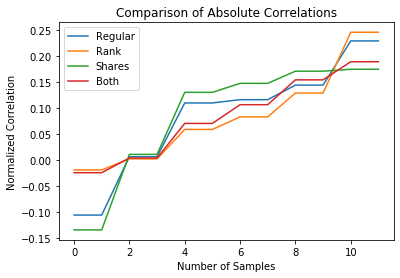

In [27]:
# The following will eventually be added to the plotting module. For now, it must be done manually.

# Randomly assign number of stocks owned
for stock in p.stocks.keys():
    p.stocks[stock].num_shares[p] = np.random.randint(1,15)

# Calculate all the weightings of correlation (i.e. regular, rank, shares, both)
b='spearman'
a=False
c=True
sh=True
r=True

reg = analysis.correlation(p, method=b, absolute=a, coeffs_only=c)
rank = analysis.correlation(p, method=b, weight_by_rank=r, absolute=a, coeffs_only=c)
shares = analysis.correlation(p, method=b, weight_by_shares=sh, absolute=a, coeffs_only=c)
both = analysis.correlation(p, method=b, weight_by_rank=r, weight_by_shares=sh, absolute=a, coeffs_only=c)

ax = sns.distplot(reg, label='Regular')
sns.distplot(rank, label='Rank')
sns.distplot(shares, label='Shares')
sns.distplot(both, label='Both')
ax.set_xlabel('Non-Absolute Correlation')
ax.set_ylabel('Number of Samples')
ax.set_title('Comparison of Non-Absolute Correlations')
ax.legend()
#plt.savefig(fname='Non-Absolute Corrs SNS', dpi=600)
plt.show()

plt.plot(reg, label='Regular')
plt.plot(rank, label='Rank')
plt.plot(shares, label='Shares')
plt.plot(both, label='Both')
plt.xlabel('Number of Samples')
plt.ylabel('Normalized Correlation')
plt.title('Comparison of Absolute Correlations')
plt.legend()
plt.savefig(fname='Absolute Corrs', dpi=600)
plt.show()